In [ ]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
install.packages("readr")
install.packages("caTools")
install.packages("class")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
# Logistic Regression

# Importing the libraries
library(ggplot2)
library(readr)
library(class)

# Importing the dataset
datasets <- read.csv('Social_Network_Ads.csv')
X <- datasets[, c('Age', 'EstimatedSalary')]
Y <- datasets[, 'Purchased']

# Splitting the dataset into the Training set and Test set
set.seed(123)
splitIndex <- sample(1:nrow(datasets), 0.75 * nrow(datasets))
X_Train <- X[splitIndex, ]
X_Test <- X[-splitIndex, ]
Y_Train <- Y[splitIndex]
Y_Test <- Y[-splitIndex]

# Feature Scaling
sc_X <- scale(X_Train)
X_Test <- scale(X_Test)

# Fitting the Logistic Regression into the Training set
classifier <- glm(Y_Train ~ ., family = binomial, data = cbind(Y_Train, X_Train), control = glm.control(maxit = 100))
summary(classifier)

# Predicting the test set results
Y_Pred <- predict(classifier, type = 'response', newdata = data.frame(X_Test))

# Making the Confusion Matrix
Y_Pred <- ifelse(Y_Pred > 0.5, 1, 0)
cm <- table(Y_Test, Y_Pred)



Call:
glm(formula = Y_Train ~ ., family = binomial, data = cbind(Y_Train, 
    X_Train), control = glm.control(maxit = 100))

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.356e+01  1.658e+00  -8.179 2.87e-16 ***
Age              2.567e-01  3.318e-02   7.735 1.03e-14 ***
EstimatedSalary  3.848e-05  6.509e-06   5.911 3.39e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 395.37  on 299  degrees of freedom
Residual deviance: 200.04  on 297  degrees of freedom
AIC: 206.04

Number of Fisher Scoring iterations: 6


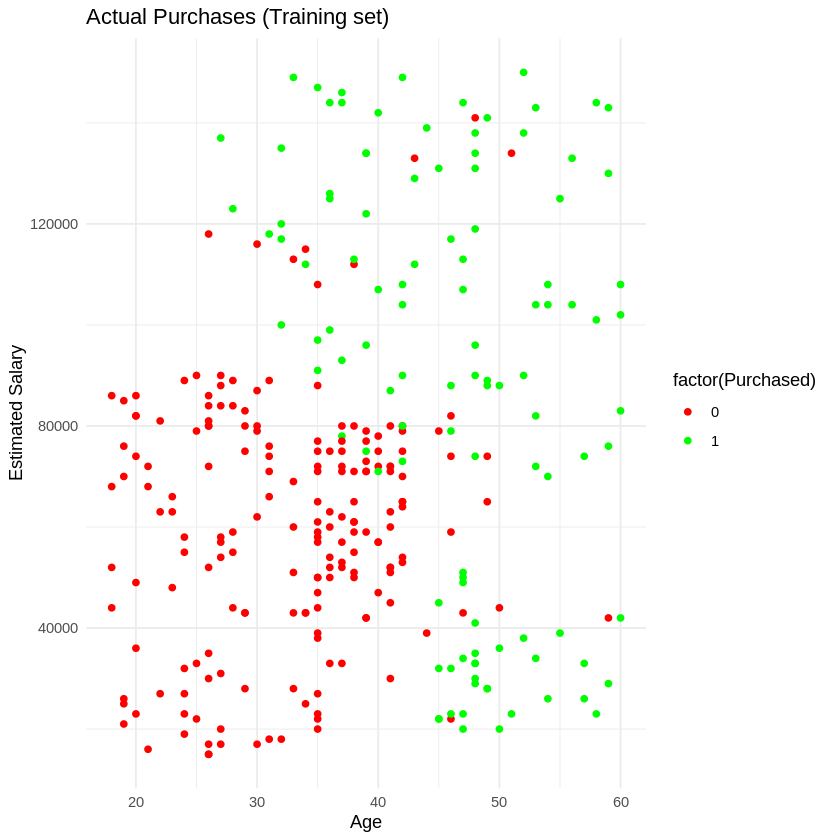

In [ ]:
# Data Visualization
library(ggplot2)

# Combine the training data and predictions
visualization_data <- cbind(X_Train, as.numeric(Y_Train), as.numeric(predict(classifier, type = 'response', newdata = data.frame(X_Train)) > 0.5))
colnames(visualization_data) <- c('Age', 'EstimatedSalary', 'Purchased', 'Prediction')

# Scatter plot
ggplot(visualization_data, aes(x = Age, y = EstimatedSalary, color = factor(Purchased))) +
  geom_point() +
  scale_color_manual(values = c('red', 'green')) +
  ggtitle('Actual Purchases (Training set)') +
  xlab('Age') +
  ylab('Estimated Salary') +
  theme_minimal()


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


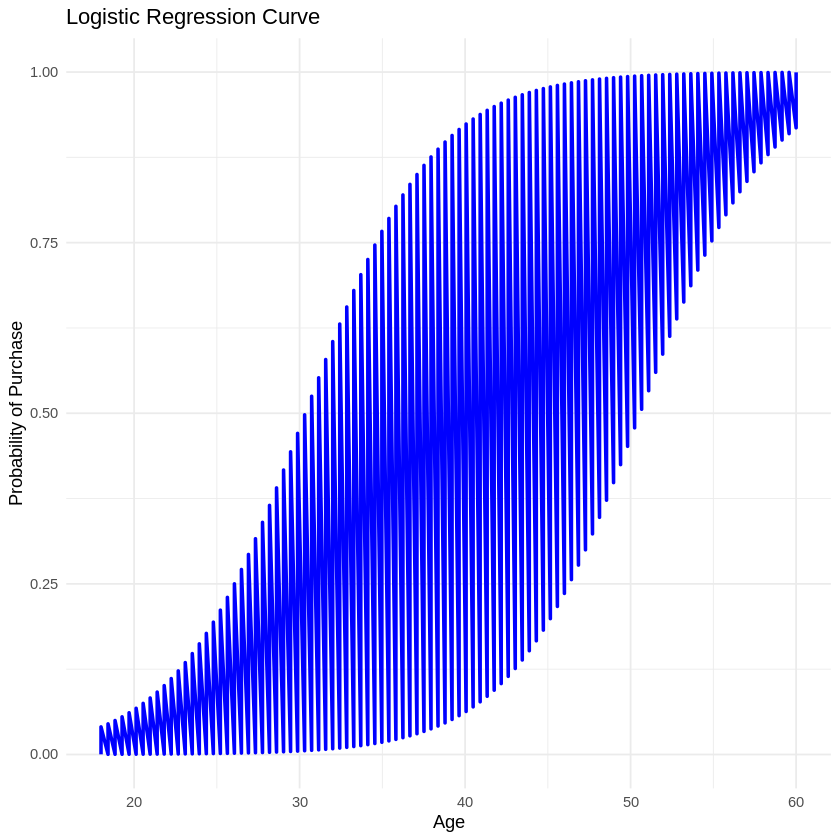

In [ ]:
# Function to calculate logistic curve
logistic_curve <- function(age, estimated_salary) {
  intercept <- -1.356e+01
  coef_age <- 2.567e-01
  coef_salary <- 3.848e-05

  log_odds <- intercept + coef_age * age + coef_salary * estimated_salary
  probability <- 1 / (1 + exp(-log_odds))

  return(probability)
}

# Generate data for plotting
plot_data <- expand.grid(Age = seq(min(X_Train$Age), max(X_Train$Age), length.out = 100),
                         EstimatedSalary = seq(min(X_Train$EstimatedSalary), max(X_Train$EstimatedSalary), length.out = 100))

plot_data$Probability <- logistic_curve(plot_data$Age, plot_data$EstimatedSalary)

# Plot logistic curve
ggplot(plot_data, aes(x = Age, y = Probability)) +
  geom_line(color = 'blue', size = 1) +
  ggtitle('Logistic Regression Curve') +
  xlab('Age') +
  ylab('Probability of Purchase') +
  theme_minimal()


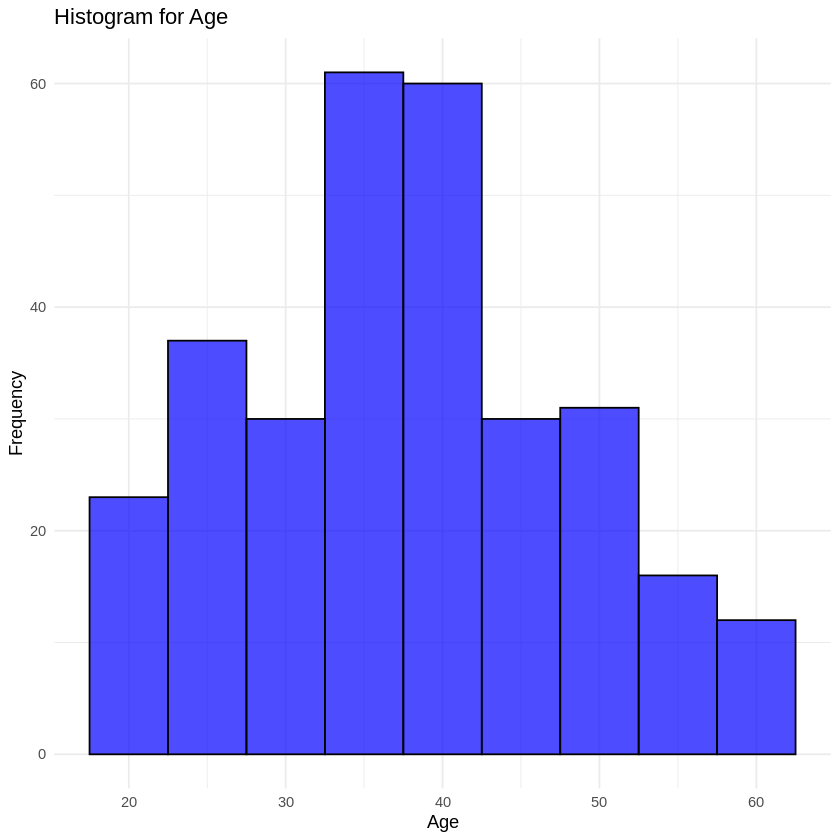

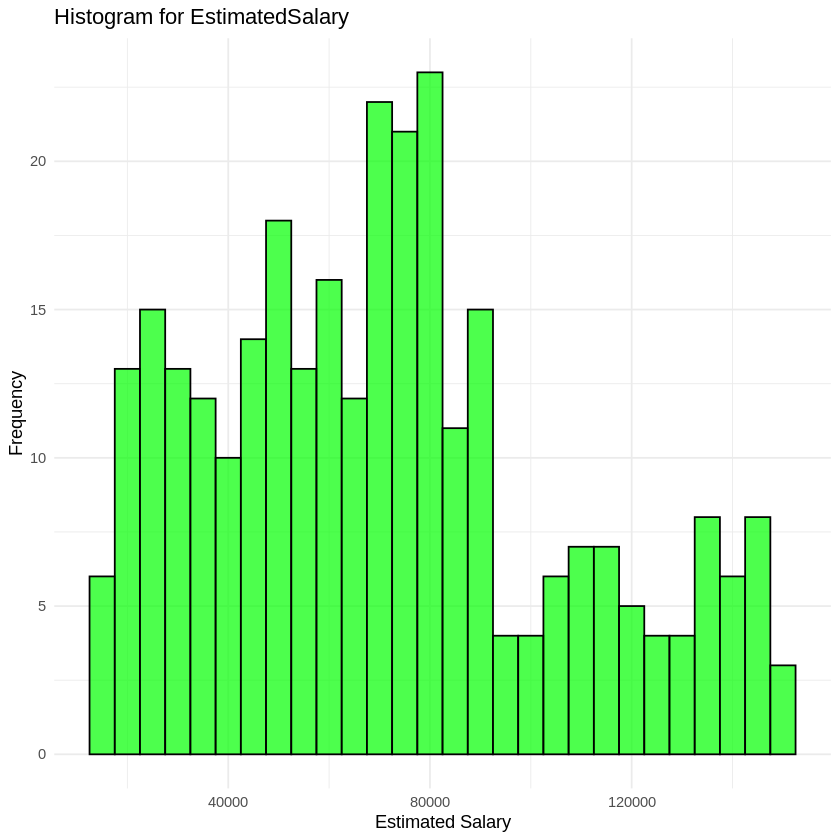

In [ ]:
# Data Visualization
library(ggplot2)

# Create a data frame for visualization
visualization_data <- cbind(X_Train, Y_Train)
colnames(visualization_data) <- c('Age', 'EstimatedSalary', 'Purchased')

# Histogram for Age
ggplot(visualization_data, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = 'blue', color = 'black', alpha = 0.7) +
  ggtitle('Histogram for Age') +
  xlab('Age') +
  ylab('Frequency') +
  theme_minimal()

# Histogram for EstimatedSalary
ggplot(visualization_data, aes(x = EstimatedSalary)) +
  geom_histogram(binwidth = 5000, fill = 'green', color = 'black', alpha = 0.7) +
  ggtitle('Histogram for EstimatedSalary') +
  xlab('Estimated Salary') +
  ylab('Frequency') +
  theme_minimal()
